# Principle Component Analysis
***
## What is the point of Principle Component Analysis?

Principle Component Analyis (PCA) is a method of dimension reduction which can be used to take data with many dimesensions and convert it into a new representation with fewer dimensions. The benefit of this is that high dimensional data can then be reduced down to its most significant compnents which enables easily visualisation.  

PCA boils down to solving:

$$ W^{*} = \underset{W^{T}W = I}{\operatorname{argmax}} W^{T}X^{T}XW $$

Where $W$ is a matrix containing the eigenvectors of the covariance matrix $X^{T}X$ 

### The Basics
The purpose of PCA is most intuativly obvious when working with simple a set of simple 2D data


In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import HTML, display

data = pd.read_csv('jupyterfiles/data.csv')
data.head()

data.head()

,X,Y
0,9.1,28.2
1,17.3,52.6
2,-17.5,-15.0
3,-6.7,2.6
4,-15.5,-28.0


The table contains a sample of the basic data we shall be running PCA on - and the graph below visualises the entire dataset

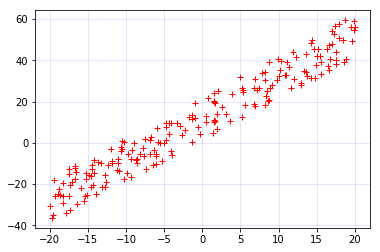

In [8]:
plt.grid(color='b', linestyle='-', linewidth=1, alpha=0.1)
plt.plot(data["X"], data["Y"], "r+")

## Step Two: Mean centring the data
PCA is performed on the mean centred covariance matrix so prior to doing PCA we must first calculate this by summing each column, dividing by the number of elements in the column, and then subtracting the value from every element in the column.

$$X^{C}_{ij} = X^{C}_{ij} - \frac{\sum_{p=0}^{n} X_{pj}}{n}$$



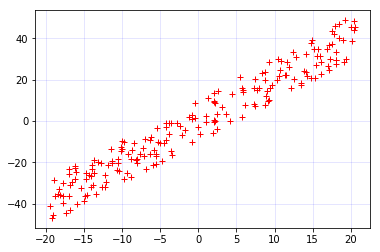

In [9]:
def meanCentre(matrix):
    return matrix - matrix.sum()/len(matrix)

centredData = meanCentre(data)

plt.grid(color='b', linestyle='-', linewidth=1, alpha=0.1)
plt.plot(centredData["X"], centredData["Y"], "r+")

## Step One: Finding the vector of most variance
In order to find the PCA representation of our data we should first find the vector of greatest variance within our data, conviently this is the larget eigenvector, (the eigenvector with the largest eigenvalue λ). There are many possible methods to finding the largest eigenvector:
2. Power Iteration
3. Finding component maximum variance

### Power Iteration


In [10]:
def multiplyDataFrames(a, b):
    mul = np.matmul(a,  b)
    res = pd.DataFrame(mul)
    return res

def normalizeMatrix(matrix):
    matrixSum = 0
    for index, element in matrix.iterrows():
        matrixSum += element ** 2
    return matrix / np.sqrt(matrixSum)
    
def powerIteration(matrix):
    covarianceMatrix = centredData.cov()    
    w = pd.DataFrame([random.randint(-10,10) for i in range(0, centredData.shape[1])])
    w = normalizeMatrix(w)    
    
    for i in range(100):
        w = multiplyDataFrames(covarianceMatrix, w)        
        w = normalizeMatrix(w)  
    
    return w

### Eigenvector of Maximum Variance

In [5]:
def maxVarEigenVector(matrix):
    print(matrix)
    eigenValues, eigenVectors = np.linalg.eig(matrix.cov())
    
    indexOfLargestEigenValue = 0
    largestEigenValue = eigenValues[0]
    
    for i in range(len(eigenValues)):
        if eigenValues[i] > largestEigenValue:
            largestEigenValue = eigenValues[i]
            indexOfLargestEigenValue = i
    
    return pd.DataFrame(eigenVectors[indexOfLargestEigenValue])    

### Iterative PCA Algorithm
Once a method for computing the largest eigenvector has been found then 

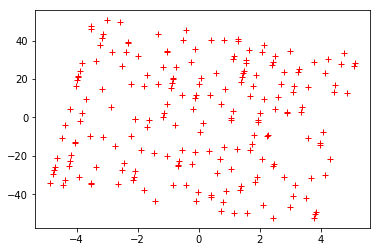

In [45]:
def pca(data, k, firstEigenVectorFunc):
    centredData = meanCentre(data)
    w = pd.DataFrame()
    z = centredData.copy()   
    
    for i in range(k):
        wi = firstEigenVectorFunc(z)    
        wi.columns = [i]
        w = pd.concat([w, wi], axis = 1)
        
        z = centredData.copy()
        for j in range(i + 1):
            wjwjt = multiplyDataFrames(pd.DataFrame(w[j]), pd.DataFrame(w[j]).transpose())
            
            projection = multiplyDataFrames(centredData.copy(), wjwjt)
            z = z - projection
        
    return multiplyDataFrames(centredData, w)
    
eigenValues, eigenVectors = np.linalg.eig(meanCentre(data).cov())
w = pd.DataFrame(eigenVectors)
w.head()

newRep = multiplyDataFrames(meanCentre(data), w)
plt.plot(newRep[0], newRep[1], "r+")